<a href="https://colab.research.google.com/github/shansalance/Melanoma_Detection_Assignment/blob/main/SHAN_SALANCE_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statement:

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.

The data set contains the following diseases:

* Actinic keratosis
* Basal cell carcinoma
* Dermatofibroma
* Melanoma
* Nevus
* Pigmented benign keratosis
* Seborrheic keratosis
* Squamous cell carcinoma
* Vascular lesion

Build a multiclass classification model using a custom convolutional neural network in TensorFlow.

In [1]:
#Importing all the important libraries
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, cv2
import PIL
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential

import warnings
warnings.filterwarnings("ignore")

**Setting the Data Path for Training and Testing Images**

In this task, we establish the file paths for the training and testing datasets. The dataset comprises approximately 2357 images categorized into 9 sub-directories within the train and test subdirectories. Each of these 9 sub-directories corresponds to a specific type of skin cancer.



In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
#Connect to google drive to get an access to the dataset
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [4]:
!unzip -o /content/gdrive/MyDrive/CNN_assignment.zip -d /content/gdrive/MyDrive/CNN_assignment

Archive:  /content/gdrive/MyDrive/CNN_assignment.zip
  inflating: /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating

In [10]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [11]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

2239


In [12]:
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

118


In [13]:
# Define some parameters for the loader
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [14]:
# Loading the training data
# using seed=123 while creating dataset using tf.keras.preprocessing.image_dataset_from_directory
# resizing images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                               seed=123,
                                                               validation_split=0.2,
                                                               image_size=(img_height,img_width),
                                                               batch_size=batch_size,
                                                               color_mode='rgb',
                                                               subset='training')

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


In [15]:
# Loading the validation data
# using seed=123 while creating dataset using tf.keras.preprocessing.image_dataset_from_directory
# resizing images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                             seed=123,
                                                             validation_split=0.2,
                                                             image_size=(img_height,img_width),
                                                             batch_size=batch_size,
                                                             color_mode='rgb',
                                                             subset='validation')

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


In [16]:
# Loading the testing data
# using seed=123 while creating dataset using tf.keras.preprocessing.image_dataset_from_directory
# resizing images to the size img_height*img_width, while writting the dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_test,
                                                             seed=123,
                                                             image_size=(img_height,img_width),
                                                             batch_size=batch_size,
                                                             color_mode='rgb')

Found 118 files belonging to 9 classes.


In [17]:
# Listing out all the classes of skin cancer and store them in a list.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


# Dataset visualisation

Creating a code to visualize one instance of all the nine classes present in the dataset

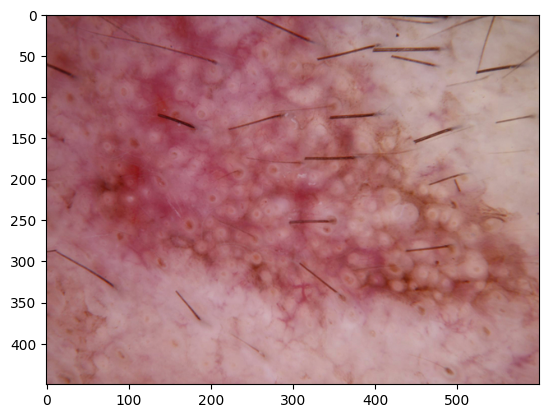

In [18]:
image = plt.imread((list(data_dir_train.glob(class_names[0]+'/*.jpg'))[0]))
plt.imshow(image)

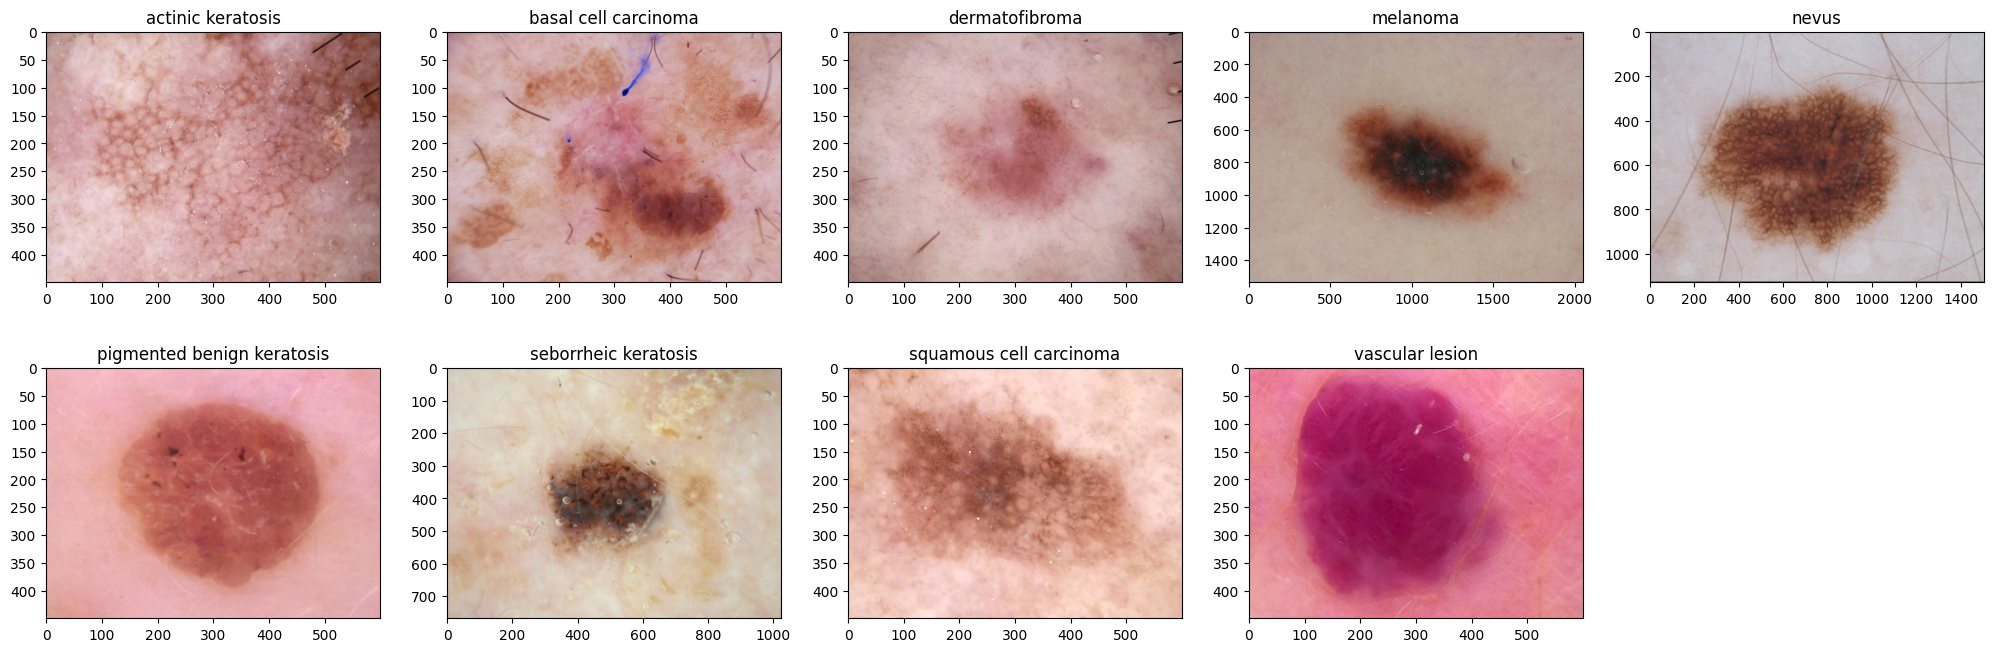

In [19]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(25,8))
for i in range(len(class_names)):
  plt.subplot(2,5,i+1)
  image= plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

In [20]:
# Configure the dataset for performance

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# `Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.\
# `Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [21]:
# Method to create plots of the loss and accuracy on the training and validation sets:
def plot_cnn_metrics(history,epochs):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

# Model Building & training :

* Developing a Convolutional Neural Network (CNN) model capable of effectively identifying the 9 distinct classes within the dataset. During model construction, we'll rescale images to standardize pixel values within the 0 to 1 range.
* Selecting a suitable optimizer and loss function for training the model. The optimizer governs how the model's weights are adjusted during training, while the loss function quantifies its performance.
* Conducting model training for approximately 20 epochs. This involves iterative weight updates to minimize the chosen loss function.
* Generating graphical plots to assess the model's performance post-training, aiming to identify any signs of overfitting or underfitting.

In [22]:
# CNN Model
model=models.Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

In [23]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 128)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 259200)            0

In [ ]:
# Training the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

In [ ]:
# Visualizing training results
plot_cnn_metrics(history,epochs)

<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <b>Summary:</b>
        <ol>
            <li>Training accuracy steadily improves with each epoch, but validation accuracy plateaus at 50%.</li>
            <li>While training loss consistently decreases, validation loss starts increasing.</li>
            <li>The plots illustrate a significant gap between training and validation accuracy, with the model achieving approximately 50% accuracy on validation data.</li>
            <li>This noticeable difference in accuracy suggests potential overfitting.</li>
        </ol>
    </span>    
</div>

# Choosing an appropriate data augmentation strategy to resolve underfitting/overfitting

Overfitting typically happens when the training dataset is limited in size. To address this issue, data augmentation employs a strategy of creating extra training data by applying random transformations to the existing samples. These transformations produce new images that appear realistic and diverse. This approach aims to provide the model with a broader exposure to various aspects of the data, ultimately enhancing its ability to generalize effectively.

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

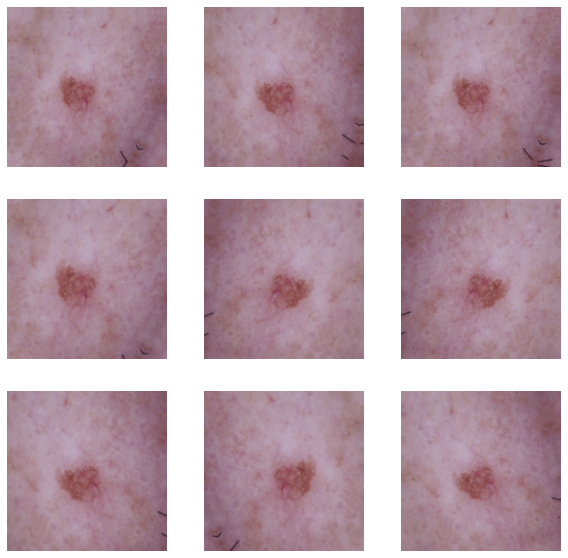

In [ ]:
# visualizing how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

# Model Building & training on the augmented data :

* Creating a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescaling images to normalize pixel values between (0,1).
* Choosing an appropriate optimiser and loss function for model training
* Training the model for ~20 epochs
* Plotting Graph for findings after the model fit to check if there is any evidence of model overfit or underfit.

In [ ]:
# CNN Model
model=models.Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))

# adding the augmentation layer before the convolution layer
model.add(data_augmentation)

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

In [ ]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 180, 180, 64)      1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 90, 90, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 90, 90, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 45, 45, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 259200)           

In [ ]:
# Training the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 5s 69ms/step - loss: 2.5712 - accuracy: 0.2785 - val_loss: 1.8183 - val_accuracy: 0.3221
Epoch 2/20
56/56 [==============================] - 4s 69ms/step - loss: 1.7301 - accuracy: 0.3845 - val_loss: 1.7805 - val_accuracy: 0.4183
Epoch 3/20
56/56 [==============================] - 4s 67ms/step - loss: 1.5662 - accuracy: 0.4487 - val_loss: 1.4632 - val_accuracy: 0.5123
Epoch 4/20
56/56 [==============================] - 4s 67ms/step - loss: 1.4968 - accuracy: 0.4749 - val_loss: 1.5134 - val_accuracy: 0.5145
Epoch 5/20
56/56 [==============================] - 4s 67ms/step - loss: 1.4002 - accuracy: 0.5033 - val_loss: 1.4031 - val_accuracy: 0.5235
Epoch 6/20
56/56 [==============================] - 4s 66ms/step - loss: 1.3958 - accuracy: 0.4905 - val_loss: 1.5502 - val_accuracy: 0.4631
Epoch 7/20
56/56 [==============================] - 4s 66ms/step - loss: 1.4064 - accuracy: 0.5089 - val_loss: 1.4360 - val_accuracy: 0.5168
Epoch 8/20
56

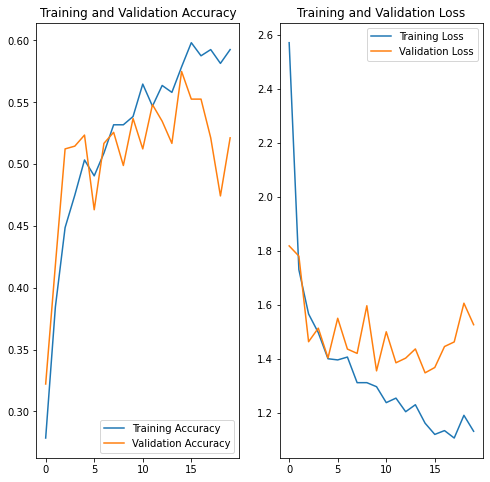

In [ ]:
# Visualizing training results
plot_cnn_metrics(history,epochs)

<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <b>Summary of Observations : </b>
        <ol>
            <li>During the training process, the accuracy of the model steadily increases, while the validation accuracy also rises but levels off at 55%.</li>
            <li>As the model trains over epochs, the training loss decreases, and the validation loss follows a similar trend by decreasing and stabilizing.</li>
            <li>The training and validation accuracy plots indicate a reduced gap compared to the previous model, achieving approximately 55% accuracy on the validation dataset.</li>
            <li>However, there is still a slightly noticeable difference between training and validation accuracy, suggesting a mild overfitting tendency.</li>
        </ol>
    </span>    
</div>


# Model Building & training on the augmented data with dropout :

Constructing a Convolutional Neural Network (CNN) model designed to effectively identify the nine distinct classes within the dataset. During model construction, we perform image rescaling to standardize pixel values within the range of 0 to 1.

Selecting a suitable optimizer and loss function for training the model effectively.

Conducting model training for approximately 20 epochs, allowing the neural network to learn from the data.

Generating visual graphs to examine the outcomes following model fitting, aiming to identify indications of potential overfitting or underfitting.

In [ ]:
# CNN Model
model=models.Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))
model.add(data_augmentation)

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())
#adding a 20% dropout after the convolution layers
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

In [ ]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 180, 180, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 90, 90, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 90, 90, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 45, 45, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 45, 45, 128)      

In [ ]:
# Training the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 5s 70ms/step - loss: 3.7059 - accuracy: 0.2115 - val_loss: 2.0258 - val_accuracy: 0.2081
Epoch 2/20
56/56 [==============================] - 4s 69ms/step - loss: 1.9399 - accuracy: 0.2812 - val_loss: 1.7526 - val_accuracy: 0.3982
Epoch 3/20
56/56 [==============================] - 4s 69ms/step - loss: 1.6360 - accuracy: 0.4107 - val_loss: 1.5832 - val_accuracy: 0.4362
Epoch 4/20
56/56 [==============================] - 4s 69ms/step - loss: 1.5808 - accuracy: 0.4559 - val_loss: 1.5743 - val_accuracy: 0.4720
Epoch 5/20
56/56 [==============================] - 4s 68ms/step - loss: 1.4386 - accuracy: 0.4855 - val_loss: 1.3722 - val_accuracy: 0.5302
Epoch 6/20
56/56 [==============================] - 4s 69ms/step - loss: 1.4028 - accuracy: 0.4916 - val_loss: 1.5680 - val_accuracy: 0.4832
Epoch 7/20
56/56 [==============================] - 4s 69ms/step - loss: 1.4238 - accuracy: 0.5006 - val_loss: 1.3930 - val_accuracy: 0.5235
Epoch 8/20
56

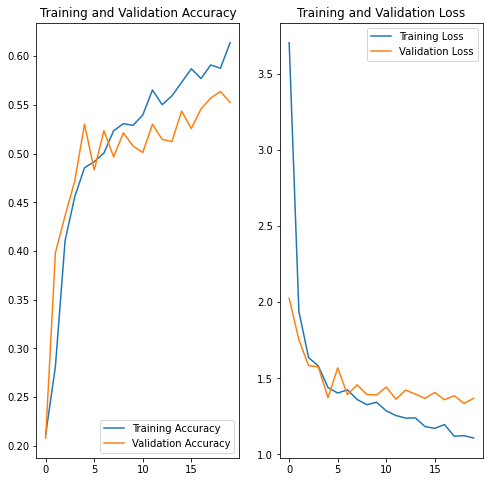

In [ ]:
# Visualizing training results
plot_cnn_metrics(history,epochs)

<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <b>Observations : </b>
        <ol>
            <li>Training accuracy consistently improves over time, while validation accuracy increases and then stabilizes at a 55% accuracy rate during the training process.</li>
            <li><b>Training loss decreases as the number of epochs increases, and this trend is mirrored in the validation loss.</b></li>
            <li>Examination of the plots reveals a reduction in the gap between training accuracy and validation accuracy compared to the previous model. The model has achieved an approximate <b>55%</b> accuracy on the validation set.</li>
            <li>The disparity in accuracy between training and validation data is <b>minimal</b>.</li>
        </ol>
    </span>  </div>





#### *It's evident that the extent of overfitting in the model has substantially diminished in comparison to the earlier models.*

# Class distribution:

Analyzing the present distribution of classes within the training dataset

Datasets often exhibit class imbalance, where one class may have a significantly larger number of samples compared to others.

Class imbalance can negatively impact the overall model quality. Therefore, it is crucial, as a preliminary check, to assess the distribution of classes within the dataset.

In [ ]:
for i in range(len(class_names)):
  print(class_names[i],' - ',len(list(data_dir_train.glob(class_names[i]+'/*.jpg'))))

actinic keratosis  -  114
basal cell carcinoma  -  376
dermatofibroma  -  95
melanoma  -  438
nevus  -  357
pigmented benign keratosis  -  462
seborrheic keratosis  -  77
squamous cell carcinoma  -  181
vascular lesion  -  139


<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <b>Observations : </b>
        <ol>
            <li>Which category has the lowest sample count?<br>
            <b>The category "seborrheic keratosis" has the fewest samples with only 77.</b></li>
            <li>Which categories are dominant in terms of the proportion of samples?<br>
            <b>The categories "pigmented benign keratosis" stand out with a substantial 462 samples.</b></li>
        </ol>
    </span>    
</div>

# Handling class imbalances:

Rectifing class imbalances present in the training dataset with Augmentor library.

In [ ]:
!pip install Augmentor

In [ ]:
#import shutil
#shutil.rmtree("/kaggle/working/")

In [ ]:
path_to_training_dataset="/kaggle/input/melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i,output_directory="/kaggle/working/melanoma/"+i+"/")
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /kaggle/working/melanoma/actinic keratosis/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FDAB4240290>: 100%|██████████| 500/500 [00:16<00:00, 30.04 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /kaggle/working/melanoma/basal cell carcinoma/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDAA47EDC90>: 100%|██████████| 500/500 [00:16<00:00, 29.44 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to /kaggle/working/melanoma/dermatofibroma/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDB6380AA50>: 100%|██████████| 500/500 [00:16<00:00, 30.54 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to /kaggle/working/melanoma/melanoma/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x7FDAB4159050>: 100%|██████████| 500/500 [01:21<00:00,  6.16 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /kaggle/working/melanoma/nevus/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=919x802 at 0x7FDAA41FBA90>: 100%|██████████| 500/500 [01:21<00:00,  6.17 Samples/s]  


Initialised with 462 image(s) found.
Output directory set to /kaggle/working/melanoma/pigmented benign keratosis/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDAB41A2F10>: 100%|██████████| 500/500 [00:16<00:00, 29.92 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to /kaggle/working/melanoma/seborrheic keratosis/.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FDAB40F3110>: 100%|██████████| 500/500 [00:41<00:00, 12.13 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to /kaggle/working/melanoma/squamous cell carcinoma/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FDAA47EC1D0>: 100%|██████████| 500/500 [00:17<00:00, 29.18 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to /kaggle/working/melanoma/vascular lesion/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FDAB41593D0>: 100%|██████████| 500/500 [00:15<00:00, 31.47 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
data_dir_train = pathlib.Path("/kaggle/working/melanoma/")
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list_new = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]

In [ ]:
dict_new = dict(zip(path_list, lesion_list_new))
df = pd.DataFrame(list(dict_new.items()),columns = ['Path','Label'])

In [ ]:
df['Label'].value_counts()

squamous cell carcinoma       500
seborrheic keratosis          500
actinic keratosis             500
nevus                         500
pigmented benign keratosis    500
vascular lesion               500
melanoma                      500
dermatofibroma                500
basal cell carcinoma          500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

In [ ]:
# initializing the parameter to load the images
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


# Model Building & training on the rectified class imbalance data :

Constructing a Convolutional Neural Network (CNN) model designed to accurately identify the 9 distinct classes found within the dataset. During model creation, we'll preprocess the images by rescaling them to normalize pixel values within the range of 0 to 1.<br>

Selecting a suitable optimizer and loss function for training the model effectively.<br>

Training the model for approximately 30 epochs.<br>

Generating graphical representations of the results post-model fitting to assess whether there are indications of overfitting or underfitting.

In [ ]:
# CNN Model
model=models.Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))
model.add(data_augmentation)

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())
#adding a 20% dropout after the convolution layers
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

In [ ]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 180, 180, 64)      1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 90, 90, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 90, 90, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 45, 45, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 45, 45, 128)      

In [ ]:
# Training the model
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
113/113 [==============================] - 15s 116ms/step - loss: 3.0245 - accuracy: 0.1656 - val_loss: 2.0685 - val_accuracy: 0.2033
Epoch 2/30
113/113 [==============================] - 13s 109ms/step - loss: 2.0032 - accuracy: 0.2225 - val_loss: 1.8752 - val_accuracy: 0.3367
Epoch 3/30
113/113 [==============================] - 13s 110ms/step - loss: 1.6604 - accuracy: 0.3567 - val_loss: 1.5939 - val_accuracy: 0.3756
Epoch 4/30
113/113 [==============================] - 14s 115ms/step - loss: 1.5112 - accuracy: 0.4061 - val_loss: 1.5149 - val_accuracy: 0.4222
Epoch 5/30
113/113 [==============================] - 13s 110ms/step - loss: 1.4732 - accuracy: 0.4378 - val_loss: 1.4563 - val_accuracy: 0.4456
Epoch 6/30
113/113 [==============================] - 14s 114ms/step - loss: 1.4181 - accuracy: 0.4642 - val_loss: 1.4174 - val_accuracy: 0.4522
Epoch 7/30
113/113 [==============================] - 13s 108ms/step - loss: 1.3734 - accuracy: 0.4783 - val_loss: 1.3938 - val_ac

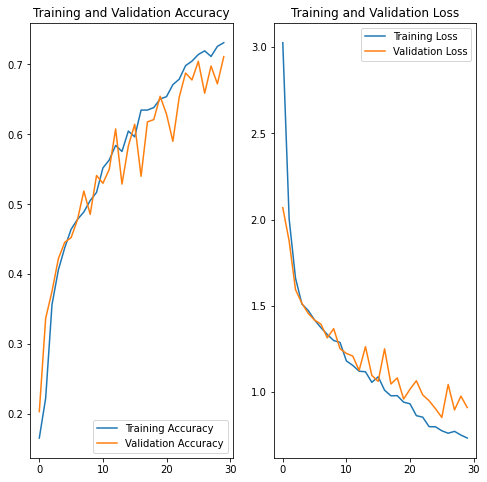

In [ ]:
# Visualizing model results
plot_cnn_metrics(history,epochs)

<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <b>Key Findings : </b>
        <ol>
            <li>Throughout the training process, both training accuracy and validation accuracy display a consistent rise.</li>
            <li>Furthermore, as training progresses, there is a steady decline in both training and validation losses.</li>
            <li>Compared to the previous model, the gap between training and validation accuracy has notably decreased, achieving approximately <b>75%</b> accuracy on the validation dataset.</li>
            <li>The variance in accuracy between training and validation is minimal.</li>
        </ol>
    </span>    
</div>

<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <p>Implementing class rebalancing not only effectively addressed overfitting but also resulted in a substantial accuracy improvement, elevating it from 55% to 75%.</p>  
    </span>    
</div>
